### Importing the required libraries

In [71]:
# data preprocessing
import pandas as pd
import numpy as np

# data visualization
from matplotlib import pyplot as plt
import seaborn as sns

# Algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC

##### Getting the data

In [37]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

##### Data Analysis and Exploration

In [38]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Finding the percentage share of missing values for each feature

In [41]:
total = df_train.isnull().sum().sort_values(ascending=False)
percentage_1 = df_train.isnull().sum()/df_train.isnull().count()*100
percentage_1 = round(percentage_1,2).sort_values(ascending=False)
missing_data = pd.concat([total, percentage_1], axis=1, keys=['Total', '%'])
missing_data


,Total,%
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00


##### Percentage of People Survived

Text(0.5, 1.0, 'People Survived')

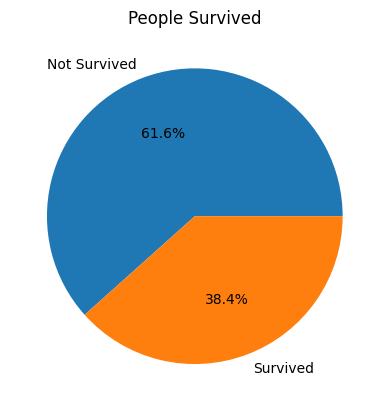

In [42]:
plt.pie(x=df_train['Survived'].value_counts().tolist(), labels=['Not Survived','Survived'], autopct='%.1f%%')
plt.title('People Survived')

#### Finding the percentage of Males and Females Survived

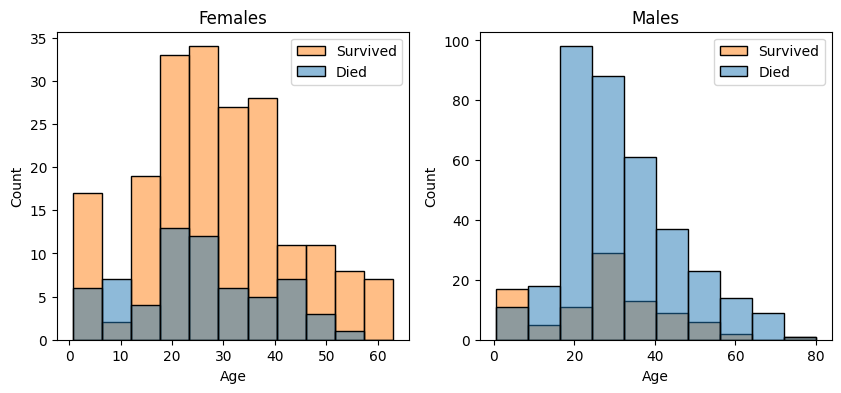

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

women = df_train[df_train['Sex']=='female']
men = df_train[df_train['Sex']=='male']

ax = sns.histplot(data=women, x='Age',label = "survived", ax = axes[0],hue='Survived').set_title('Females')
axes[0].legend(labels=['Survived', 'Died'])

ax = sns.histplot(data=men, x='Age', bins=10, label = 'survived', ax = axes[1],hue='Survived').set_title('Males')
_ = axes[1].legend(labels=['Survived', 'Died'])

- From the above graph, it is evident that majority of women survived during the Titanic mishap while majority of male passengers died

##### Dependency of Embarked on the survival of the passengers

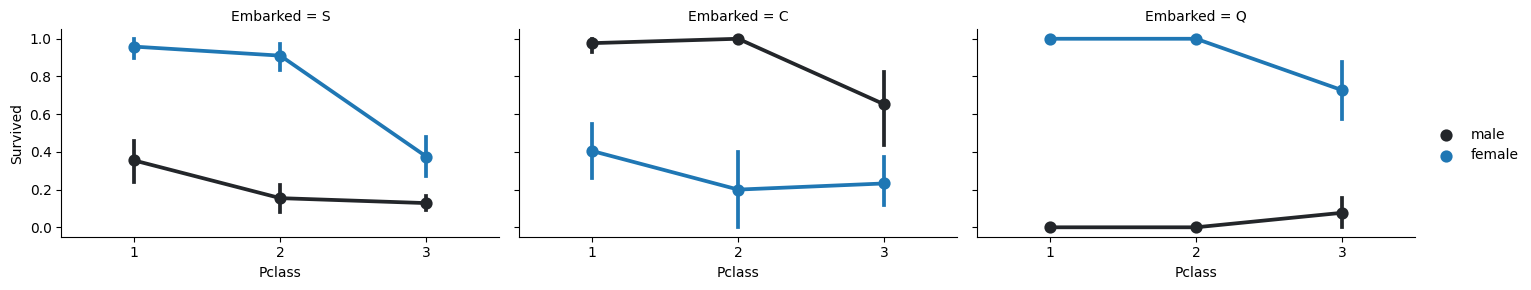

In [44]:
FacetGrid = sns.FacetGrid(df_train, col='Embarked', aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

#### P Class can also be responsible for the survival rate which can be verified below

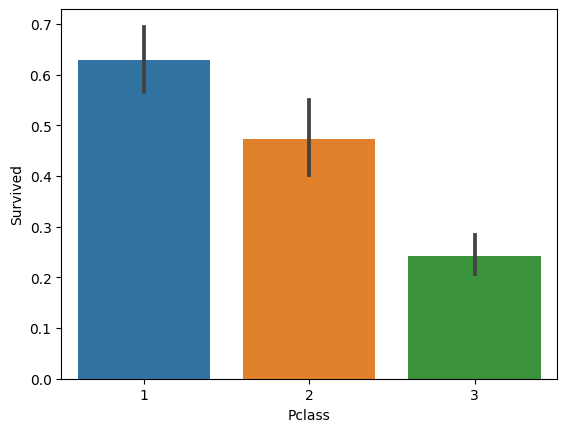

In [45]:
_ = sns.barplot( data=df_train,x='Pclass', y='Survived',estimator='mean')

The chances of survival was better for the people in the P1 class on average

### Handling Missing Data

- Filling Missing age values with random numbers, which are computed based on the mean age value in regards to the standard deviation and is_null.

In [46]:
data = [df_train, df_test]

for dataset in data:
    mean = df_train["Age"].mean()
    std = df_test["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = df_train["Age"].astype(int)
    

df_train["Age"].isnull().sum()

0

- Handlling missing value in 'Embarked' Column

In [47]:
df_train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [48]:
common_value = 'S'
data = [df_train, df_test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

### Converting Features

##### Fare
- Converting “Fare” from float to int64, using the “astype()” function pandas provides:

In [49]:
data = [df_train, df_test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

##### Name:
- We will use the Name feature to extract the Titles from the Name, so that we can build a new feature out of that.

In [50]:
data = [df_train, df_test]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
    
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
    
    
df_train = df_train.drop(['Name'], axis=1)
df_test = df_test.drop(['Name'], axis=1)

#### Sex:
- Convert ‘Sex’ feature into numeric.

In [51]:
genders = {"male": 0, "female": 1}
data = [df_train, df_test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

- The ticker attribute doesn't seems to add any value in finding the survival expectence of a passenger, so it will be better to drop it/

In [52]:
df_train = df_train.drop(['Ticket'], axis=1)
df_test= df_test.drop(['Ticket'], axis=1)

#### Embarked
- Converting Embarked into numeric type

In [53]:
data = [df_train,df_test]

ports = {'S': 0, 'C': 1, 'Q':2}

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [54]:
data = [df_train, df_test]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [55]:
df_train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,0,2,1,0,7,NaN,0,1
1,2,1,1,1,5,1,0,71,C85,1,3
2,3,1,3,1,3,0,0,7,NaN,0,2
3,4,1,1,1,5,1,0,53,C123,0,3
4,5,0,3,0,5,0,0,8,NaN,0,1
5,6,0,3,0,6,0,0,8,NaN,2,1
6,7,0,1,0,6,0,0,51,E46,0,1
7,8,0,3,0,0,3,1,21,NaN,0,4
8,9,1,3,1,3,0,2,11,NaN,0,3
9,10,1,2,1,1,1,0,30,NaN,1,3


- Cabin and Parch are not going to contribute to derive the relations as much, therefore dropping them both will be a good decision

In [58]:
data = [df_train,df_test]

for dataset in data:
    dataset.drop('Cabin', axis=1,inplace=True)
    dataset.drop('Parch', axis=1, inplace=True)

- Finding relations amongst various features of the dataset using heatmap

<Axes: >

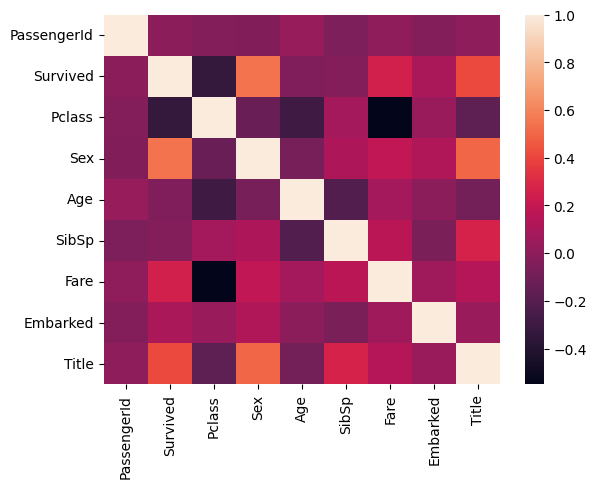

In [59]:
sns.heatmap(df_train.corr())

- Creating a new feature Age times class i.e. Age * PClass

In [60]:
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [61]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked,Title,Age_Class
0,1,0,3,0,2,1,7,0,1,6
1,2,1,1,1,5,1,71,1,3,5
2,3,1,3,1,3,0,7,0,2,9
3,4,1,1,1,5,1,53,0,3,5
4,5,0,3,0,5,0,8,0,1,15
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,3,0,13,0,5,6
887,888,1,1,1,2,0,30,0,2,2
888,889,0,3,1,3,1,23,0,2,9
889,890,1,1,0,3,0,30,1,1,3


### Building Machine Learning Models

In [62]:
X_train = df_train.drop(["Survived","PassengerId"], axis=1)
Y_train = df_train["Survived"]
X_test  = df_test.drop("PassengerId", axis=1).copy()

#### Random Forest

In [63]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

##### Logistic Regression

In [64]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

#### KNN

In [65]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

##### Decision Tree

In [66]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

##### Linear Support Vector Machines

In [67]:
linear_svc = LinearSVC(max_iter=1000)
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### Validating the accuracy of the models

In [68]:
results = pd.DataFrame({
    'Model': [ 'KNN', 'Logistic Regression', 
              'Random Forest',  
              'Decision Tree',
              'Linear SVM'],
    'Score': [ acc_knn, acc_log, 
              acc_random_forest, 
              acc_decision_tree,
              acc_linear_svc]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
93.38,Random Forest
93.38,Decision Tree
82.94,KNN
81.48,Logistic Regression
74.52,Linear SVM


As we can see, Random forrest does the best work on the given datasets

#### Cross Validation
- K FOLD

In [69]:
from sklearn.model_selection import KFold

k_fold = KFold(n_splits=10, shuffle=True, random_state=4)

In [70]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.75555556 0.84269663 0.7752809  0.83146067 0.8988764  0.80898876
 0.80898876 0.7752809  0.85393258 0.83146067]
Mean: 0.8182521847690388
Standard Deviation: 0.04063910312392621


- Our model has a average accuracy of 82% with a standard deviation of 4 %. 
- The standard deviation shows us, how precise the estimates are. 
- This means in our case that the accuracy of our model can differ (+/—) 4%

##### Confusion Matrix

In [75]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[485,  64],
       [107, 235]], dtype=int64)

The first row is about the not-survived-predictions: 485 passengers were correctly classified as not survived (called true negatives) and 64 where wrongly classified as not survived (false positives).

The second row is about the survived-predictions: 107 passengers where wrongly classified as survived (false negatives) and 235 where correctly classified as survived (true positives)

#### F - Score

In [73]:
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.7370030581039756

##### Precision and Recall

In [74]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.7724358974358975
Recall: 0.7046783625730995
